# Covid-19 Trend Analysis

*As the Covid-19 outbreaks rapidly all over the world day by day and also affects the lives of million, a number of countries declared complete lockdown to check its intensity. Here I developed an experimental approach to analyse the trend of this pandemic all over the India. For this experiment I mailny used some popular python packages like - **pandas**, **numpy** for computational purpose; **matplotlib**, **plotly**, **seaborn**, **dash** for visualization purpose. Finally I developed a interactive dashboard for displaying the final analysis for each state of India.*

### - By Arunava Kumar Chakraborty

## Importing Certain Libraries

In [1]:
import math
import pandas as pd
import numpy as np
import time

import matplotlib.pylab as plt
import plotly.graph_objs as go
import plotly.offline as py
import seaborn as sns;

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

from sklearn.impute import SimpleImputer

plt.style.use('fivethirtyeight')
%matplotlib inline

C:\Users\Arunava\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



## Read the Dataset

In [2]:
df = pd.read_csv('covid_19_india.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15554 entries, 0 to 15553
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       15554 non-null  int64 
 1   Date                      15554 non-null  object
 2   Time                      15554 non-null  object
 3   State/UnionTerritory      15554 non-null  object
 4   ConfirmedIndianNational   15554 non-null  object
 5   ConfirmedForeignNational  15554 non-null  object
 6   Cured                     15554 non-null  int64 
 7   Deaths                    15554 non-null  int64 
 8   Confirmed                 15554 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.1+ MB


In [4]:
print(df.shape)
df.head(10)

(15554, 9)


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
5,6,2020-02-04,6:00 PM,Kerala,3,0,0,0,3
6,7,2020-02-05,6:00 PM,Kerala,3,0,0,0,3
7,8,2020-02-06,6:00 PM,Kerala,3,0,0,0,3
8,9,2020-02-07,6:00 PM,Kerala,3,0,0,0,3
9,10,2020-02-08,6:00 PM,Kerala,3,0,0,0,3


In [5]:
df.rename(columns={'State/UnionTerritory':'State', 'Cured':'Recovered'},inplace=True)
print(df.shape)
df.head(10)

(15554, 9)


,Sno,Date,Time,State,ConfirmedIndianNational,ConfirmedForeignNational,Recovered,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
5,6,2020-02-04,6:00 PM,Kerala,3,0,0,0,3
6,7,2020-02-05,6:00 PM,Kerala,3,0,0,0,3
7,8,2020-02-06,6:00 PM,Kerala,3,0,0,0,3
8,9,2020-02-07,6:00 PM,Kerala,3,0,0,0,3
9,10,2020-02-08,6:00 PM,Kerala,3,0,0,0,3


In [6]:
df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m-%d')
df.head(10)

,Sno,Date,Time,State,ConfirmedIndianNational,ConfirmedForeignNational,Recovered,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
5,6,2020-02-04,6:00 PM,Kerala,3,0,0,0,3
6,7,2020-02-05,6:00 PM,Kerala,3,0,0,0,3
7,8,2020-02-06,6:00 PM,Kerala,3,0,0,0,3
8,9,2020-02-07,6:00 PM,Kerala,3,0,0,0,3
9,10,2020-02-08,6:00 PM,Kerala,3,0,0,0,3


In [7]:
imputer = SimpleImputer(strategy='constant')
df2 = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [8]:
df2 = df.groupby(['Date','State'])[['Date','State','Confirmed','Deaths','Recovered']].sum().reset_index()
df2.to_csv("Covid19 Final Data.csv")
print(df2.shape)
df2.head(10)

(15554, 5)


,Date,State,Confirmed,Deaths,Recovered
0,2020-01-30,Kerala,1,0,0
1,2020-01-31,Kerala,1,0,0
2,2020-02-01,Kerala,2,0,0
3,2020-02-02,Kerala,3,0,0
4,2020-02-03,Kerala,3,0,0
5,2020-02-04,Kerala,3,0,0
6,2020-02-05,Kerala,3,0,0
7,2020-02-06,Kerala,3,0,0
8,2020-02-07,Kerala,3,0,0
9,2020-02-08,Kerala,3,0,0


In [9]:
states = df2['State'].unique()
print("Total number of States = ", len(states))

Total number of States =  40


## Finding the State wise Total Trends

In [10]:
#Finding the country wise total nos. of confirmed, death & recocoverd case(s) and their percentage.
TotalConfirmed, TotalRecovered, TotalDeath = 0, 0, 0
SumConfirmed, SumRecovered, SumDeath = 0, 0, 0
PerConfirmed, PerRecovered, PerDeath = 0.0, 0.0, 0.0

TotalConfirmed = df2['Confirmed'].sum()
TotalRecovered = df2['Recovered'].sum()
TotalDeath = df2['Deaths'].sum()

print("The Total no. of Confirmed cases in All over India = ", TotalConfirmed)
print("The Total no. of Recovered cases in All over India = ", TotalRecovered)
print("The Total no. of Death cases in All over India = ", TotalDeath)

state = input("Enter the name of the State : ")
for idx in range(0,len(states)):
    if states[idx] == state:
        C = df2[df2['State']==states[idx]]

SumConfirmed = C['Confirmed'].sum()
SumRecovered = C['Recovered'].sum()
SumDeath = C['Deaths'].sum()

PerConfirmed = (SumConfirmed/TotalConfirmed)*100
PerRecovered = (SumRecovered/TotalRecovered)*100
PerDeath = (SumDeath/TotalDeath)*100

print("The Total no. of Confirmed cases in ", state, " = ", SumConfirmed, "& The Percentage is = ", round(PerConfirmed,2), "%")
print("The Total no. of Recovered cases in ", state, " = ", SumRecovered, "& The Percentage is = ", round(PerRecovered,2), "%")
print("The Total no. of Death cases in ", state, " = ", SumDeath, "& The Percentage is = ", round(PerDeath,2), "%")

The Total no. of Confirmed cases in All over India =  3283193148
The Total no. of Recovered cases in All over India =  2952434997
The Total no. of Death cases in All over India =  45089472
Enter the name of the State : West Bengal
The Total no. of Confirmed cases in  West Bengal  =  156986842 & The Percentage is =  4.78 %
The Total no. of Recovered cases in  West Bengal  =  144027845 & The Percentage is =  4.88 %
The Total no. of Death cases in  West Bengal  =  2600002 & The Percentage is =  5.77 %


## Finding the State wise Trend

Enter the name of the state : West Bengal


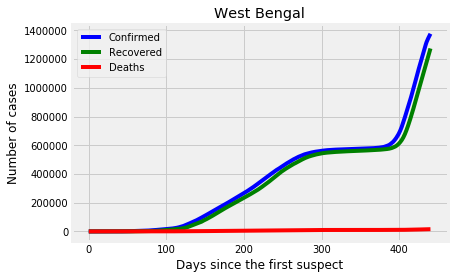

In [11]:
#Finding the country wise Covid-19 Trends for Confirmed, Recovered & Deaths Cases.
state = input("Enter the name of the state : ")
for idx in range(0,len(states)):
    if states[idx] == state:
        C = df2[df2['State']==states[idx]].reset_index()
plt.plot(np.arange(0,len(C)),C['Confirmed'],color='blue',label='Confirmed')
plt.plot(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
plt.plot(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
plt.title(state)
plt.xlabel('Days since the first suspect')
plt.ylabel('Number of cases')
plt.legend()
plt.show()    

In [13]:
state = input("Enter the name of the state : ")
fig = go.Figure()
for idx in range(0,len(states)):
    if states[idx] == state:
        C = df2[df2['State']==states[idx]].reset_index()
fig.add_trace(go.Scatter(x=C['Date'],y=C['Confirmed'],name='Confirmed Rate'))
fig.add_trace(go.Scatter(x=C['Date'],y=C['Deaths'],name='Death Rate'))
fig.add_trace(go.Scatter(x=C['Date'],y=C['Recovered'],name='Recovered Rate'))

GraphTitle = "Covid-19 Trend in "+state
fig.update_layout(
    title=GraphTitle,
    xaxis_title="Dates",
    yaxis_title="Number of cases",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#7f7f7f"
    )
)

fig.show()

Enter the name of the state : Tamil Nadu


## Finding the World Wide Trend

In [14]:
df3 = df2.groupby(['Date'])[['Date','Confirmed','Deaths','Recovered']].sum().reset_index()

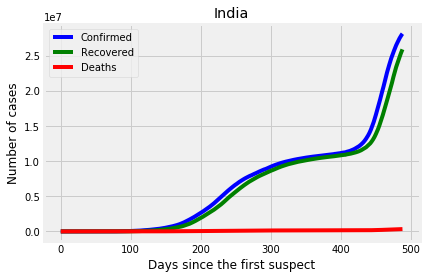

In [15]:
C = df3
plt.plot(np.arange(0,len(C)),C['Confirmed'],color='blue',label='Confirmed')
plt.plot(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
plt.plot(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
plt.title('India')
plt.xlabel('Days since the first suspect')
plt.ylabel('Number of cases')
plt.legend()
plt.show()

In [16]:
fig = go.Figure()
C = df3
fig.add_trace(go.Scatter(x=C['Date'],y=C['Confirmed'],name='Confirmed Rate'))
fig.add_trace(go.Scatter(x=C['Date'],y=C['Deaths'],name='Death Rate'))
fig.add_trace(go.Scatter(x=C['Date'],y=C['Recovered'],name='Recovered Rate'))

GraphTitle = "Covid-19 Trend in India"
fig.update_layout(
    title=GraphTitle,
    xaxis_title="Dates",
    yaxis_title="Number of cases",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#7f7f7f"
    )
)

fig.show()